In [33]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import glob
df = pd.read_csv('/cluster/scratch/boehis/runs/infer_configs/UNSUPERVISED/median/len128/res128/AriaPPG_SizeW128_SizeH128_ClipLength128_DataTypeRaw_DataAugNone_LabelTypeRaw_Crop_faceFalse_BackendHC_Large_boxTrue_Large_size1.5_Dyamic_DetFalse_det_len30_Median_face_boxFalse_unsupervised/saved_outputs/POS_all_results.csv', index_col=0)
df['PID'] = df['index'].str[4:8]
df['label'] = df['label'].apply(eval)
new = []
for pid in df['PID'].unique():
    train = df[df['PID'] != pid]
    test = df[df['PID'] == pid].copy()

    test['prediction'] = [train['label'].apply(np.array).mean()] * len(test)
    new.append(test)
new = pd.concat(new)

In [35]:
df

,index,slice,prediction,label,PID
0,headP001T1,0,"[-0.0009428944541379826, -0.001283195549275842...","[-0.0077990107, 0.27105734, 0.59387946, 0.8778...",P001
1,headP001T1,1,"[0.001359836750032924, 0.0025232662717578646, ...","[-0.69973177, -0.32156375, 0.026746895, 0.3275...",P001
2,headP001T1,10,"[-0.000295306828817757, 0.0024160509109379807,...","[0.9131451, 0.8237517, 0.7255981, 0.6238959, 0...",P001
3,headP001T1,11,"[0.00044928825512704097, 0.0016729624243442, 0...","[0.41850913, 0.28229052, 0.14820585, 0.0204509...",P001
4,headP001T1,12,"[0.0036592701780357216, 0.009096751776110083, ...","[0.2739806, 0.13039814, -0.029996136, -0.20622...",P001
...,...,...,...,...,...
7180,statP024T6,5,"[0.002552423230065913, 0.0035096076659561883, ...","[0.46331507, 0.08901272, -0.32029662, -0.73633...",P024
7181,statP024T6,6,"[-0.0001989639574599526, 0.0015171181323429452...","[1.238129, 1.1154547, 0.9538937, 0.7476667, 0....",P024
7182,statP024T6,7,"[-0.0035958520823758068, -0.005632692231315745...","[0.5069303, 0.9142847, 1.1694812, 1.3011342, 1...",P024
7183,statP024T6,8,"[-0.0010004383783579671, -0.002941437140736148...","[-0.45841625, -0.8407843, -1.2247646, -1.55039...",P024


In [44]:
df['prediction'] = df['prediction'].apply(eval)

/cluster/software/stacks/2024-05/python-cuda/3.11.6/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/cluster/software/stacks/2024-05/python-cuda/3.11.6/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/cluster/software/stacks/2024-05/python-cuda/3.11.6/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/cluster/softw

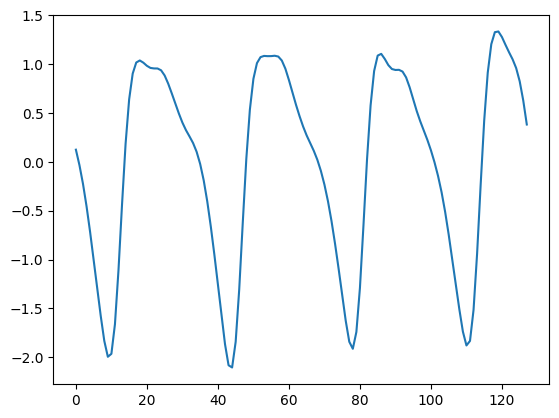

/cluster/software/stacks/2024-05/python-cuda/3.11.6/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/cluster/software/stacks/2024-05/python-cuda/3.11.6/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/cluster/software/stacks/2024-05/python-cuda/3.11.6/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/cluster/softw

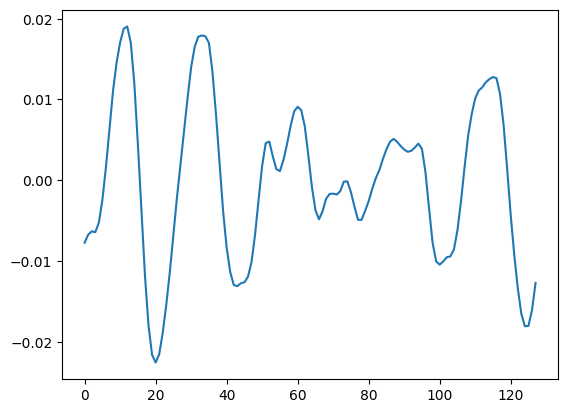

: 

In [60]:
import matplotlib.pyplot as plt
plt.plot(new['label'][800])
plt.show()
plt.plot(new['prediction'][800])

In [18]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import glob
df = pd.read_csv('/cluster/scratch/boehis/runs/infer_configs/UNSUPERVISED/median/len128/res128/AriaPPG_SizeW128_SizeH128_ClipLength128_DataTypeRaw_DataAugNone_LabelTypeRaw_Crop_faceFalse_BackendHC_Large_boxTrue_Large_size1.5_Dyamic_DetFalse_det_len30_Median_face_boxFalse_unsupervised/saved_outputs/baseline_metrics_output.csv')
df['ae_peak'] = (df['hr_label_Peak'] - df['hr_pred_Peak']).abs()
df['ae_fft'] = (df['hr_label_FFT'] - df['hr_pred_FFT']).abs()
df.mean(numeric_only=True)

hr_label_Peak    74.114540
hr_pred_Peak     73.295164
SNR_Peak         -5.589421
hr_label_FFT     71.748047
hr_pred_FFT      72.608119
SNR_FFT          -4.881237
macc              0.093897
ae_peak           9.807187
ae_fft            9.808175
dtype: float64

In [9]:

# Reform function to reshape the data
def reform_data(df_slice):
    labels = np.concatenate(df_slice.sort_values(by='slice')['label'].values)
    return {
        "index": df_slice['index'].iloc[0],
        "labels": labels}
# Function to read CSV files (unsupervised data)
def read_csv_files(path):
    df = pd.read_csv(os.path.join(path, 'POS_all_results.csv'), index_col=0)
    df['label'] = df['label'].apply(eval)

    result_list = []
    for (index), group in df.groupby('index'):
        result_list.append(reform_data(group))
    
    return pd.DataFrame(result_list).reset_index(drop=True)

In [10]:

# Paths for unsupervised data
UNSUPERVISED_ROOT_PATH = '/cluster/scratch/boehis/runs/infer_configs/UNSUPERVISED/'
UNSUPERVISED_PATH = os.path.join(UNSUPERVISED_ROOT_PATH, 'median', 'len128', 'res128', 'AriaPPG_SizeW128_SizeH128_ClipLength128_DataTypeRaw_DataAugNone_LabelTypeRaw_Crop_faceFalse_BackendHC_Large_boxTrue_Large_size1.5_Dyamic_DetFalse_det_len30_Median_face_boxFalse_unsupervised', 'saved_outputs')
data_frame = read_csv_files(UNSUPERVISED_PATH)
data_frame['PID'] = data_frame['index'].str[4:8]  # Assuming PID is in this position
data_frame['TID'] = data_frame['index'].str[8:]   # Assuming TID is in this position
data_frame['CAM'] = data_frame['index'].str[:4]   # Assuming CAM is in this position
data_frame = data_frame[data_frame['CAM']=='stat']


In [17]:
# test_data['predictions']  = [train_data['labels'].apply(np.array).mean()] * len(test_data) 

data_frame['labels'].apply(np.array).apply(len).unique()

array([3584, 5376, 2560, 3968])

In [27]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import glob
# Function to generate the folder structure for unsupervised and supervised data
def generate_folder_structure(dim=128, clip_length=128, data_type='Raw', is_unsupervised=True):
    unsupervised_flag = 'unsupervised' if is_unsupervised else ''
    label_type = 'DiffNormalized' if data_type == 'DiffNormalized_Standardized' else data_type 
    return f"AriaPPG_SizeW{dim}_SizeH{dim}_ClipLength{clip_length}_DataType{data_type}_DataAugNone_LabelType{label_type}_Crop_faceFalse_BackendHC_Large_boxTrue_Large_size1.5_Dyamic_DetFalse_det_len30_Median_face_boxFalse{unsupervised_flag}"



In [28]:
SUPERVISED_ROOT_PATH = '../runs/train_configs/'
generate_folder_structure(dim=72,  clip_length=128, data_type='DiffNormalized_Standardized', is_unsupervised=False)
folds = os.path.join(SUPERVISED_ROOT_PATH, 'PhysNet',    'median',  'loso_cv_retrain')

In [45]:
files = glob.glob(os.path.join(SUPERVISED_ROOT_PATH, 'PhysNet',    'median',  'loso_cv_retrain',"fold_*","*","saved_test_outputs","*.pickle"))

In [47]:
import torch
import io
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

with open(files[6], 'rb') as f:
    data2 = CPU_Unpickler(f).load()

In [49]:
data2['predictions'].keys()

dict_keys(['headP019T1', 'headP019T2', 'headP019T3', 'headP019T5', 'headP019T6', 'statP019T1', 'statP019T2', 'statP019T3', 'statP019T5', 'statP019T6'])

In [48]:
data['predictions'].keys()

dict_keys(['headP020T1', 'headP020T2', 'headP020T3', 'headP020T5', 'headP020T6', 'statP020T1', 'statP020T2', 'statP020T3', 'statP020T5', 'statP020T6'])

In [68]:
data

{'predictions': {'headP020T1': {0: tensor([ 0.7545,  0.9199,  1.0975,  1.1778,  1.3977,  1.4390,  1.3168,  1.1230,
            0.7506,  0.4874,  0.1247, -0.4451, -0.6333, -0.4000, -0.1987,  0.1268,
            0.4411,  0.9554,  1.3878,  1.7358,  1.8754,  2.1328,  2.2886,  2.3712,
            2.3040,  2.2040,  2.0778,  1.7178,  1.9045,  2.3589,  2.6903,  3.0999,
            3.2484,  3.4816,  3.4380,  3.0904,  2.7146,  2.3286,  1.8319,  0.7791,
            0.3254,  0.1004, -0.0592, -0.3530, -0.6232, -0.3655, -0.0953,  0.4120,
            0.2535,  0.2519,  0.3588,  0.4173,  0.3621,  0.4080,  0.5959,  0.8568,
            0.9592,  1.2501,  1.5673,  2.2930,  2.1082,  2.0250,  1.8509,  1.5119,
            1.0725,  0.4125, -0.1186, -0.7532, -1.1617, -1.7069, -1.9228, -1.8912,
           -2.0281, -1.8969, -1.5780, -0.8931, -0.6048, -0.2802,  0.1932,  0.8971,
            0.9371,  0.6191,  0.4816,  0.5881,  0.3063, -0.3202, -0.6518, -0.7648,
           -0.8430, -0.9469, -1.0448, -1.0434, -1.1235,

In [66]:
len((data | data2)['predictions'].keys())

10

In [65]:
path = os.path.join(SUPERVISED_ROOT_PATH, 'PhysNet',    'median',  'loso_cv_retrain')
'_'.join(path.split(os.sep)[-3:])

'PhysNet_median_loso_cv_retrain'

In [20]:
ROOT_PATH = '../runs/infer_configs/'
path = os.path.join(ROOT_PATH,
                    'PURE_PhysNet_DiffNormalized',
                    'first_frame',
                    'AriaPPG_SizeW128_SizeH128_ClipLength128_DataTypeDiffNormalized_DataAugNone_LabelTypeDiffNormalized_Crop_faceFalse_BackendHC_Large_boxTrue_Large_size1.5_Dyamic_DetFalse_det_len30_Median_face_boxFalse',
                    'saved_test_outputs',
                    'PURE_PhysNet_DiffNormalized_AriaPPG_outputs.pickle')

# Read in data and list subjects
with open(path, 'rb') as f:
    data = pickle.load(f)

print(data['label_type']) # prints DiffNormalized

reformed = []
for index in sorted(data['predictions'].keys()):
    predictions = _reform_data_from_dict(data['predictions'][index], False)
    labels = _reform_data_from_dict(data['labels'][index], False)
    reformed.append({
        "index": index,
        "method": 'PURE_PhysNet_DiffNormalized',
        "labels": labels,
        "predictions": predictions
    })
reformed_df = pd.DataFrame(reformed)

In [47]:
reformed_df.iloc[0]['labels'].shape

(3584,)